In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

In [115]:
class SigmoidNeuron:
    def __init__(self):
        self.w=None
        self.b=None
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    def grad_w(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)* y_pred * (1-y_pred)*x
    def grad_b(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        return (y_pred-y)* y_pred * (1-y_pred)
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=False,display_loss=False):
        #Initialize w,b
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
        if display_loss:
            loss={}
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw +=self.grad_w(x,y)
                db +=self.grad_b(x,y)
            self.w -=learning_rate*dw
            self.b -=learning_rate*db
            if display_loss:
                y_pred=self.sigmoid(self.perceptron(X))
                loss[i]=mean_squared_error(y_pred,Y)
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()
                
    def predict(self,X):
         Y_pred=[]
         for x in X:
             y_pred=self.sigmoid(self.perceptron(x))
             Y_pred.append(y_pred)
         return Y_pred
        
        

In [26]:
#Fit for toy data
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y=[1,1,1,0,0,0]

In [27]:
sn=SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [35]:
for i in range(10):
    print(sn.w,sn.b)
    sn.fit(X,Y,1,0.5,False)

[[ 0.30222227 -0.51010544]] [-0.07201447]
[[ 0.30002177 -0.50934719]] [-0.06835558]
[[ 0.29824468 -0.5090169 ]] [-0.0646183]
[[ 0.29671264 -0.50893049]] [-0.0608482]
[[ 0.29532342 -0.50898221]] [-0.05707125]
[[ 0.29401886 -0.50911184]] [-0.05330202]
[[ 0.292766   -0.50928528]] [-0.04954863]
[[ 0.29154621 -0.50948323]] [-0.04581553]
[[ 0.29034892 -0.50969484]] [-0.0421051]
[[ 0.28916816 -0.50991395]] [-0.03841856]


[[ 0.24761197 -0.51888676]] [0.0939187]
[[ 0.24717559 -0.51898987]] [0.09532392]
[[ 0.24674059 -0.51909281]] [0.09672494]
[[ 0.24630698 -0.51919558]] [0.09812178]
[[ 0.24587474 -0.5192982 ]] [0.09951446]
[[ 0.24544388 -0.51940065]] [0.100903]
[[ 0.24501439 -0.51950295]] [0.10228741]
[[ 0.24458625 -0.51960509]] [0.10366773]
[[ 0.24415947 -0.51970707]] [0.10504396]
[[ 0.24373404 -0.5198089 ]] [0.10641613]


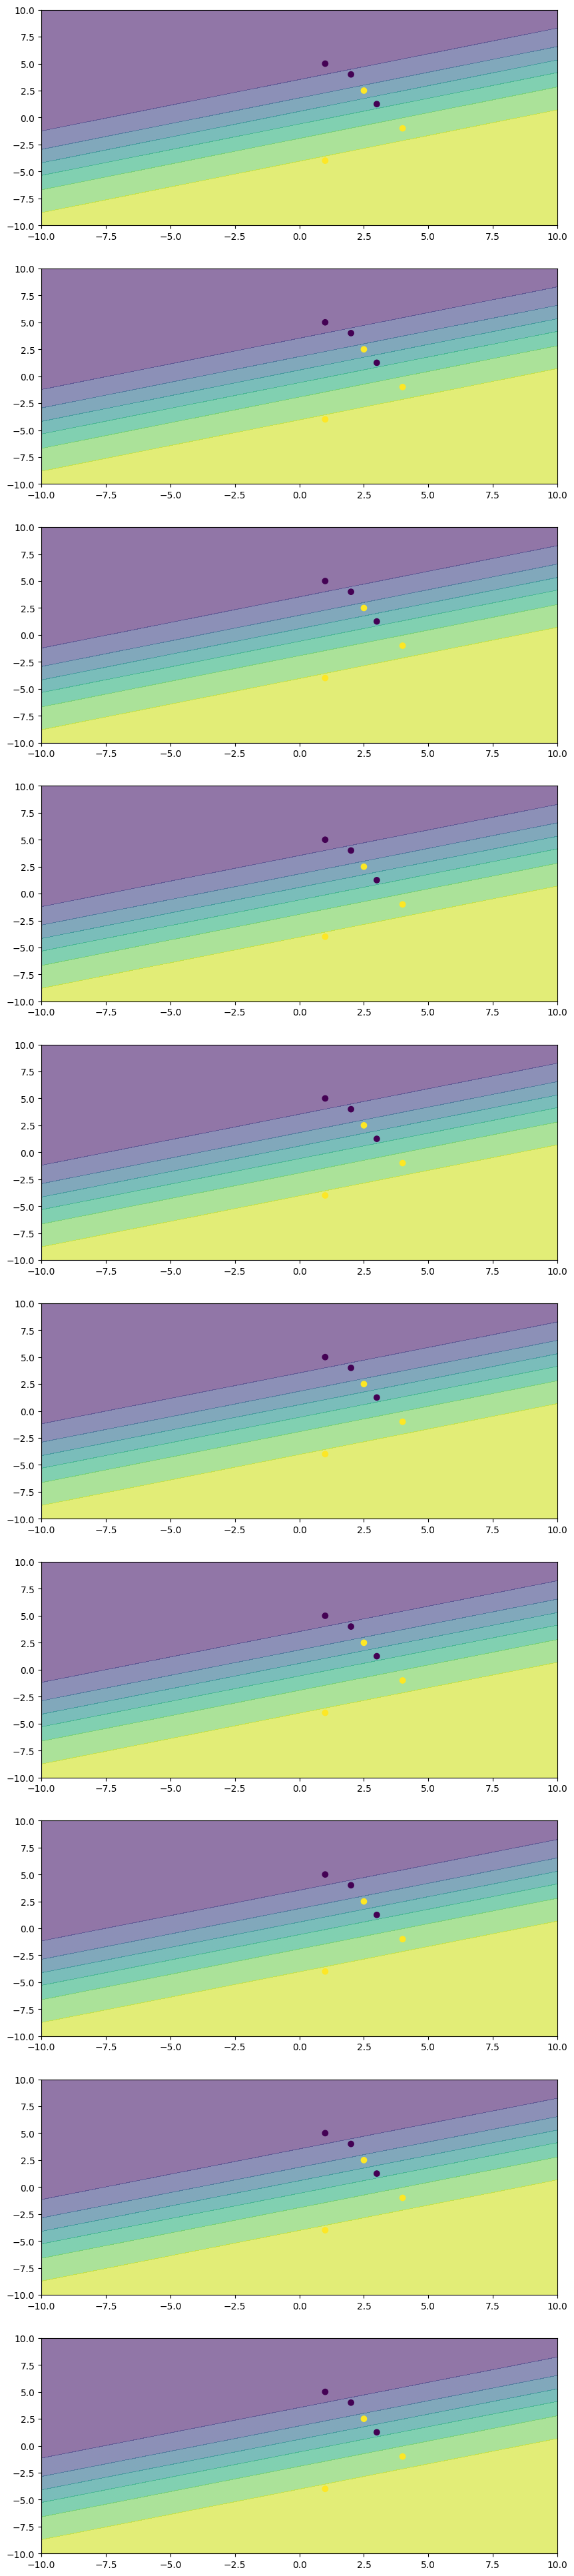

In [41]:
def plot_sn(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size):
            val=np.asarray([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1,XX2,YY,alpha=0.6)
    ax.scatter(X[:,0],X[:,1],c=Y)
    plt.plot()


sn.fit(X,Y,1,0.25,False)
N=20
plt.figure(figsize=(10,N*5))
for i in range(10):
    print(sn.w,sn.b)
    ax=plt.subplot(N,1,i+1)
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.25,False)

In [43]:
data=pd.read_csv("mobile_cleaned.csv")
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [44]:
X=data.drop('Rating',axis=1)
Y=data['Rating']

In [51]:
threshold=4.2
data['Class']=(data['Rating']>=threshold).astype(np.int16)


In [56]:
data['Class'].value_counts(normalize=True)
Y_binarized=data['Class'].values

In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarized)

In [59]:
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [85]:
scaler=StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [86]:
minmaxscaler=MinMaxScaler()
Y_scaled_train=minmaxscaler.fit_transform(Y_train.values.reshape(-1,1))
Y_scaled_test=minmaxscaler.transform(Y_test.values.reshape(-1,1))

In [87]:
scaled_threshold=list(minmaxscaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]
scaled_threshold

0.6800000000000002

In [88]:
Y_binarized_train=(Y_scaled_train>scaled_threshold).astype(np.int16).ravel()
Y_binarized_test=(Y_scaled_test>scaled_threshold).astype(np.int16).ravel()

C:\Users\aksha\AppData\Local\Temp\ipykernel_42176\1414386745.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

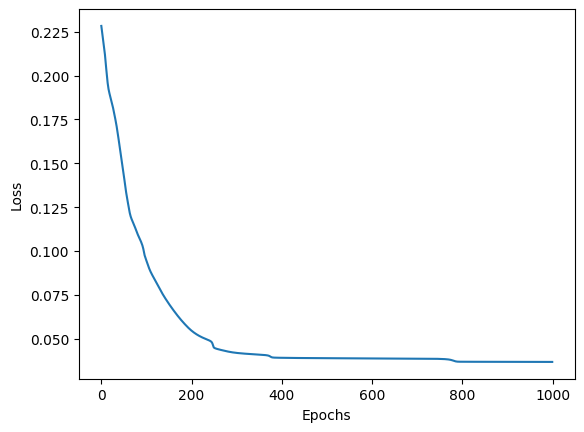

0.8 0.813953488372093


In [116]:
sn=SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs=1000,learning_rate=0.015,initialise=True,display_loss=True)
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)
Y_pred_binarized_train=(Y_pred_train>scaled_threshold).astype(np.int16).ravel()
Y_pred_binarized_test=(Y_pred_test>scaled_threshold).astype(np.int16).ravel()
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(Y_pred_binarized_train,Y_binarized_train)
accuracy_test=accuracy_score(Y_pred_binarized_test,Y_binarized_test)
print(accuracy_train,accuracy_test)

0.7058823529411765 0.6511627906976745
